In [1]:
library(ggplot2)
library(viridis)

Loading required package: viridisLite



In [2]:
data = read.table("subfigs/performance/jsd.csv", sep=",", header=TRUE)

In [3]:
vec = c("observed", "uncorrected", "corrected")

In [4]:
data_profile = data[data$atac.versus.dnase %in% vec,]

In [5]:
data_profile$atac.versus.dnase <- factor(data_profile$atac.versus.dnase , levels=c("observed", "uncorrected", "corrected"))


Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


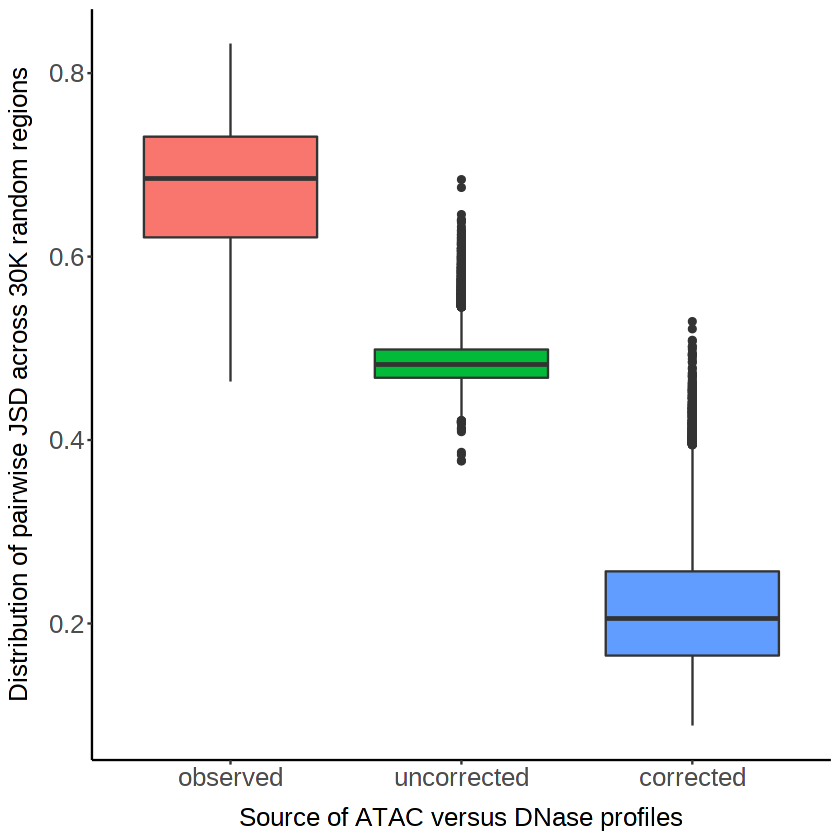

In [7]:

ggplot(data_profile, aes(x=atac.versus.dnase, y=jsd.values, fill=atac.versus.dnase)) +
geom_boxplot() +
theme_classic() + 
    xlab("Source of ATAC versus DNase profiles") + 
    ylab("Distribution of pairwise JSD across 30K random regions") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) 

ggsave("subfigs/performance/profiles.pdf", dpi=300, device="pdf")

In [8]:
data_importance= data[!(data$atac.versus.dnase %in% vec),]

In [9]:
data_importance$atac.versus.dnase <- factor(data_importance$atac.versus.dnase , levels=c("uncorrected counts", "counts", "uncorrected profile", "profile"))


Saving 6.67 x 6.67 in image



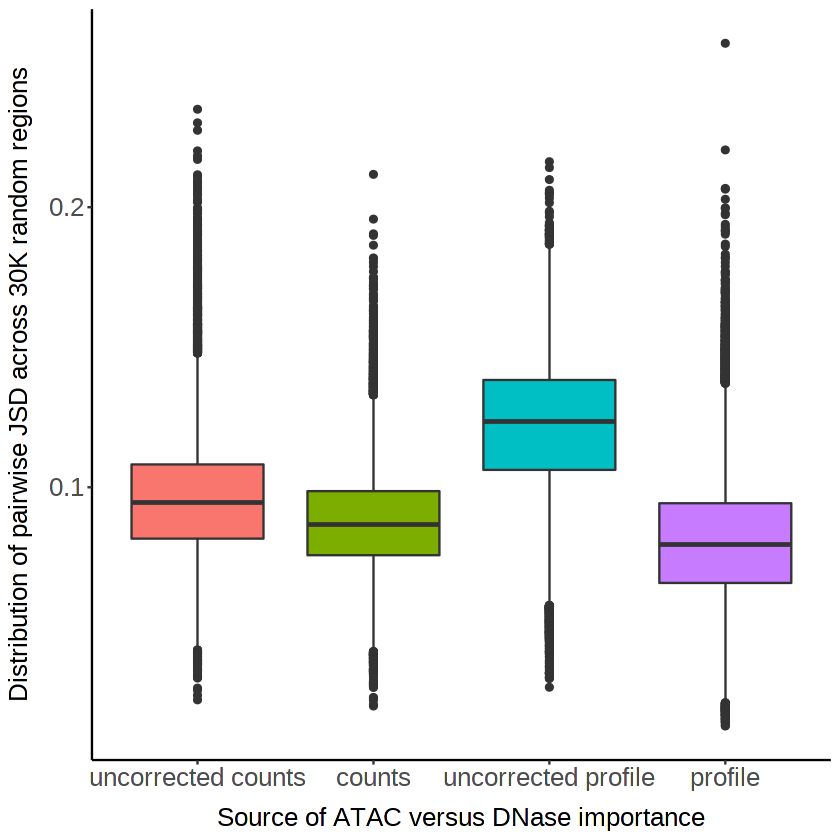

In [10]:
ggplot(data_importance, aes(x=atac.versus.dnase, y=jsd.values, fill=atac.versus.dnase)) +
geom_boxplot() +
theme_classic() + 
      xlab("Source of ATAC versus DNase importance") + 
      ylab("Distribution of pairwise JSD across 30K random regions") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) 

ggsave("subfigs/performance/importance.pdf", dpi=300, device="pdf")